In [213]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV

In [214]:
#reading file using pandas
dataset = pd.read_csv("diabetes.csv")#use the path of your file after downloading from Dataset folder

In [215]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [216]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [217]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [218]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Here, few data from columns Glucose, Insulin, skin thickness, BMI and Blood Pressure have the values of 0. That is not acceptable beacause those values cannot be zero for anyone in the world, If there are no outliers i will replace those zeros with the mean data of the respective columns. Else, if there are outliers I use median.

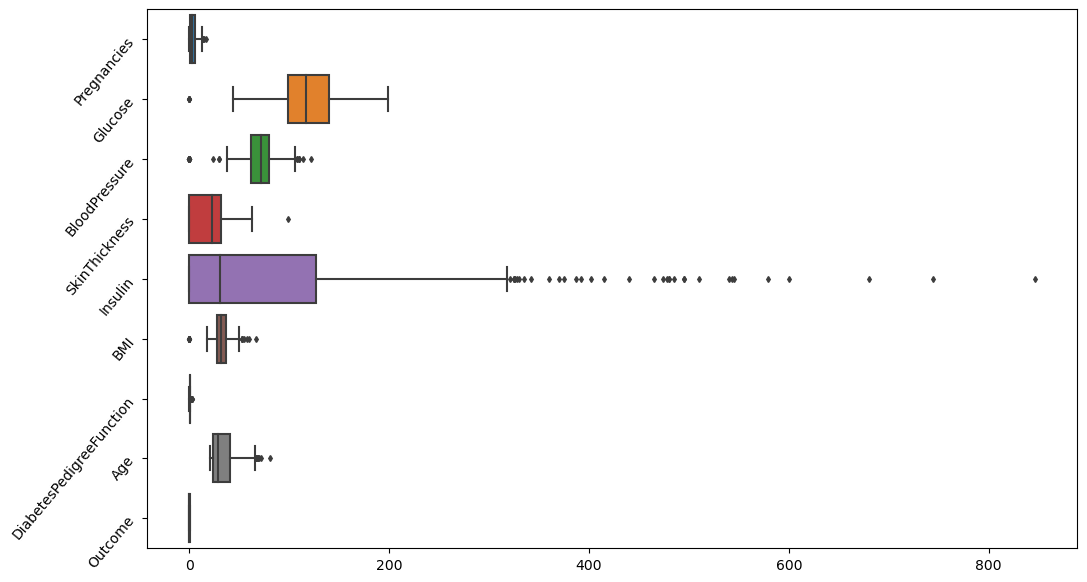

In [219]:
#Checking for outliers using boxplot
fig,ax = plt.subplots(figsize = (12,7))
sns.boxplot(data = dataset,ax=ax,fliersize=3,orient="h")
plt.yticks(rotation = 50)
plt.show()

Insulin column data has very high outliers. So, replacing Insulin zero values with medain and other columns with their mean

In [220]:
#Replacing zeros with mean of the repective columns
cols = ["Glucose","BloodPressure","SkinThickness","BMI"]
for col in cols:
    dataset[col] = dataset[col].replace(0,dataset[col].mean())

In [221]:
#Replacing zero of Insulin with median
dataset["Insulin"] = dataset["Insulin"].replace(0,dataset["Insulin"].median())

In [222]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [223]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33,1


In [224]:
#Saving the updated data frame to csv, so that this can be used directly for other models
dataset.to_csv("updated_diabetes.csv",index=False)

In [225]:
#Independent and Dependent features
X = dataset.drop(columns="Outcome")
y = dataset["Outcome"]

In [226]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.0,32.9,0.171,63
764,2,122.0,70.0,27.000000,30.5,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.0,26.2,0.245,30
766,1,126.0,60.0,20.536458,30.5,30.1,0.349,47


In [227]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [228]:
#separating dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.25)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [229]:
import pickle
def standard_scaler(X_train,X_test):
    #standard scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    pickle.dump(scaler,open("scaler.pkl",'wb'))
    
    return X_train_scaled,X_test_scaled

In [230]:
X_train_scaled,X_test_scaled = standard_scaler(X_train,X_test)

In [231]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [232]:
X_test_scaled

array([[-0.82986389,  2.56591881,  0.27922165, ...,  1.46903995,
         2.78665365, -0.96584853],
       [-0.53768687, -0.49968691,  0.11084355, ...,  0.13573925,
        -0.19434743, -0.88246592],
       [ 0.04666716, -1.53266275, -0.89942504, ...,  0.19308552,
        -0.23349189, -0.71570071],
       ...,
       [-0.82986389, -0.43304331, -1.06780314, ..., -1.03985921,
         1.4406865 , -1.04923114],
       [-0.24550986,  0.20007091,  0.44759974, ..., -1.65633158,
        -0.60385869,  1.7857775 ],
       [ 0.33884418, -1.13280114,  0.44759974, ..., -0.72445475,
        -0.63396981,  0.28489057]])

In [233]:
import warnings
warnings.filterwarnings('ignore')

In [234]:
#calculating cross validation score using KFold with 10 splits for the training data
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)
from sklearn.model_selection import cross_val_score
score = cross_val_score(LogisticRegression(),X_train_scaled,y_train,cv=cv)

In [235]:
print("Cross Valdation score for 10 splits:",score)
print("Average Cross Validation score:",np.mean(score))

Cross Valdation score for 10 splits: [0.68965517 0.86206897 0.75862069 0.79310345 0.79310345 0.74137931
 0.71929825 0.71929825 0.80701754 0.75438596]
Average Cross Validation score: 0.7637931034482758


In [236]:
#Hyperparameter tuning using GridSearch CV
parameters = {"penalty":["l1","l2"],"C":np.logspace(-3,3,7),"solver":["newton-cg","lbfgs","liblinear"]}


In [237]:
import warnings
warnings.filterwarnings("ignore")
logreg = LogisticRegression()
clf = GridSearchCV(logreg,param_grid=parameters,cv=10,scoring="accuracy")
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [238]:
clf.best_estimator_

LogisticRegression(solver='newton-cg')

In [239]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [240]:
clf.best_score_

0.7655172413793103

In [241]:
# After using GridSearch CV we got the best parameters to use in logistic regression
log_reg=LogisticRegression(C=1.0, penalty = 'l2', solver= 'newton-cg')
log_reg.fit(X_train_scaled,y_train)
y_pred = log_reg.predict(X_test_scaled)

In [242]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [243]:
#Checking performance
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred))
print("Accuracy :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion_matrix :
[[118  12]
 [ 26  36]]
Accuracy : 0.8020833333333334
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



The accuracy of the test and predicted data is high (80%), surpassing the cross-validation score of the training data obtained through k-fold cross-validation (76%). This suggests that the model generalizes well to new, unseen data. The higher accuracy on the test set indicates the effectiveness of the trained model in making accurate predictions on real-world scenarios, instilling confidence in its predictive capabilities.

In [244]:
#saving the logistic regression model to use in the application
import pickle
pickle.dump(log_reg,open("LogisticModel.pkl",'wb'))

After evaluating various models using metrics such as accuracy, classification report, cross-validation score, and Grid Search CV best score, I have chosen to deploy my application using the Logistic Regression pickle file. This model demonstrated superior performance with an accuracy of 80% compared to other models.